In [1]:
from nilearn.plotting import plot_glass_brain
import nilearn.plotting
import glob
import nibabel as nib
from nilearn.image import mean_img
import nilearn.plotting as plotting
import numpy as np

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
mask_imgs = glob.glob('/media/Data/KPE_BIDS/derivatives/fmriprep/sub-*/ses-1/func/sub-*_ses-1_task-Memory_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz')
len(mask_imgs)

22

In [5]:
mask_mean = mean_img(mask_imgs)

In [15]:
func_files = glob.glob('/media/Data/work/modelfit/_subject_id_*/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz')
len(func_files)

20

/media/Data/work/modelfit/_subject_id_1322/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz
/media/Data/work/modelfit/_subject_id_1387/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz
/media/Data/work/modelfit/_subject_id_1339/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz
/media/Data/work/modelfit/_subject_id_1464/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz
/media/Data/work/modelfit/_subject_id_1315/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz
/media/Data/work/modelfit/_subject_id_1223/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz
/media/Data/work/modelfit/_subject_id_1499/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz
/media/Data/work/modelfit/_subject_id_1307/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz
/media/Data/work/modelfit/_subject_id_1351/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz
/media/Data/work/modelfit/_subject_id_008/modelestimate/mapflow/_modelest

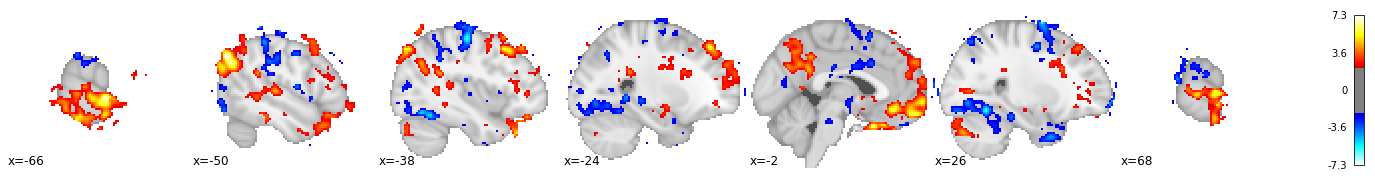

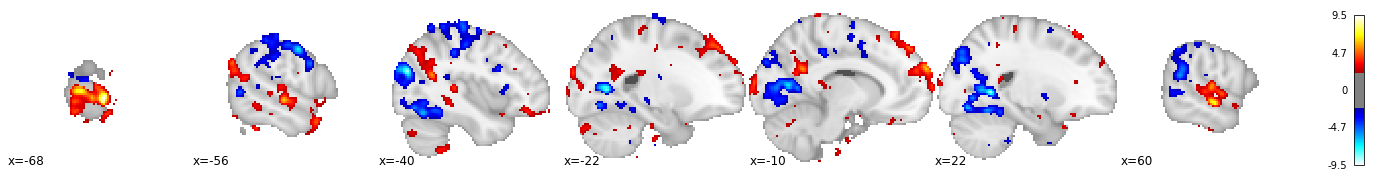

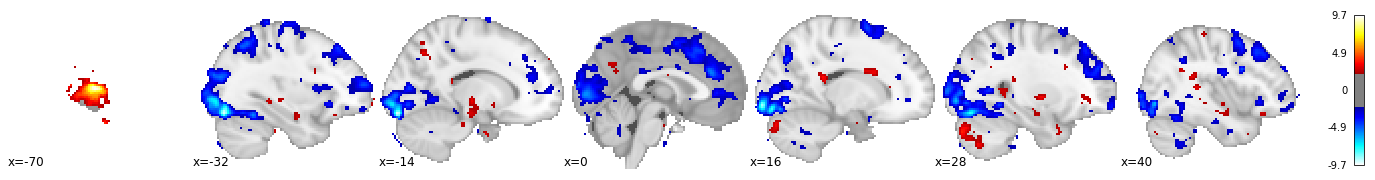

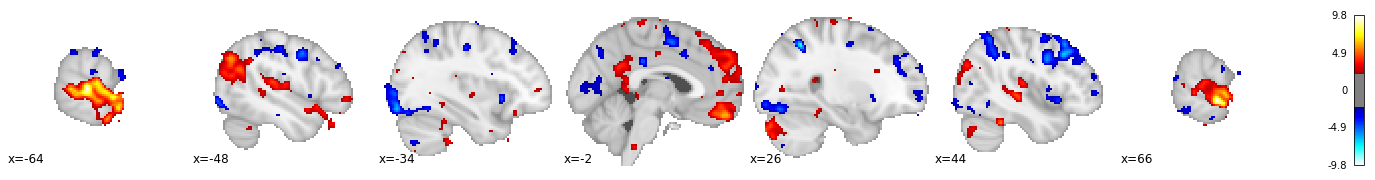

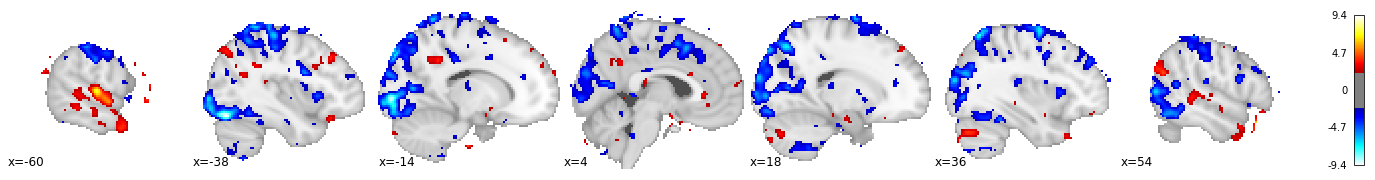

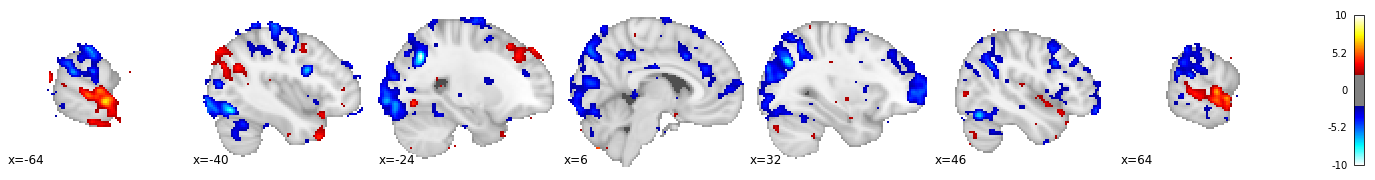

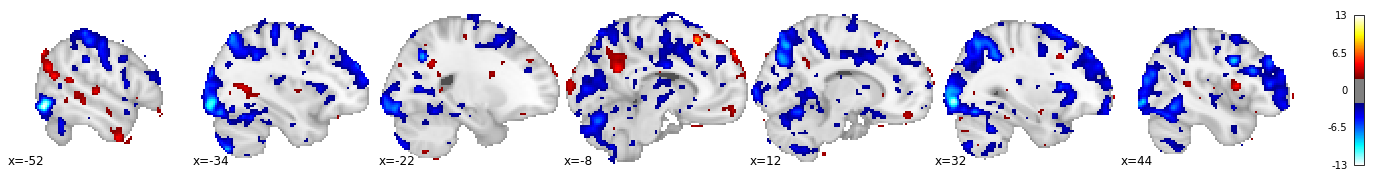

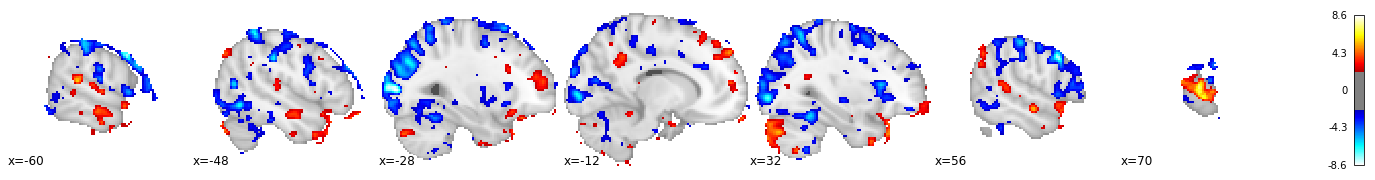

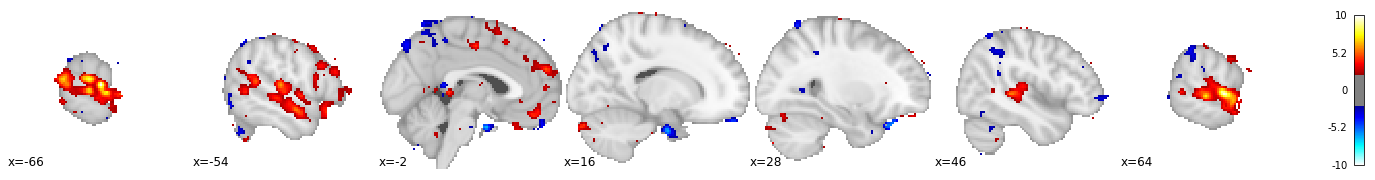

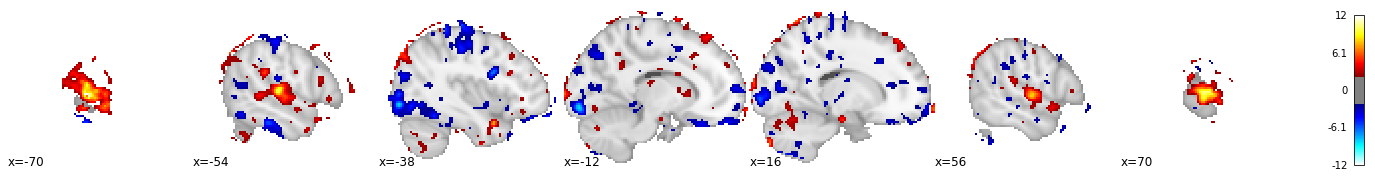

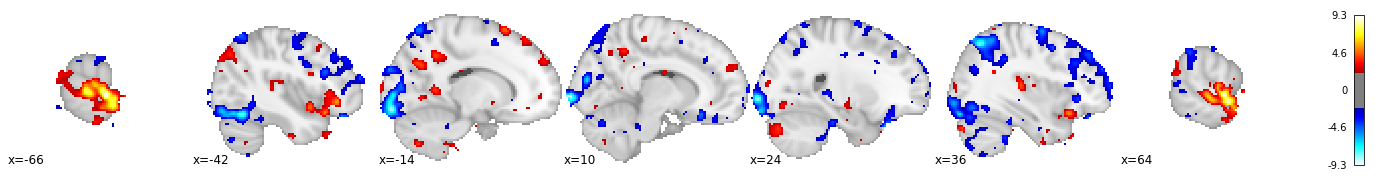

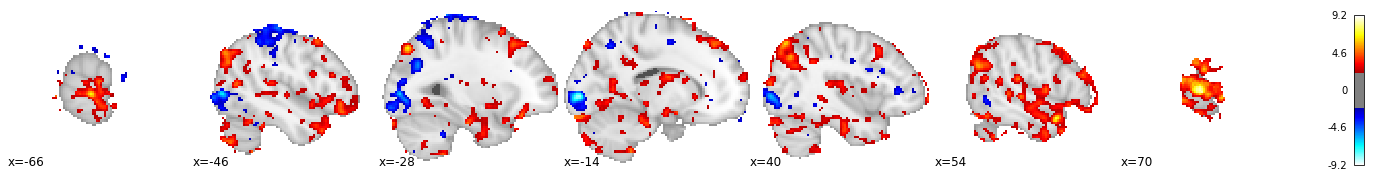

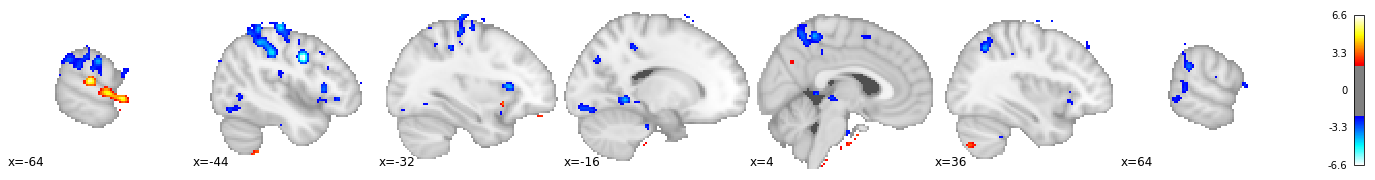

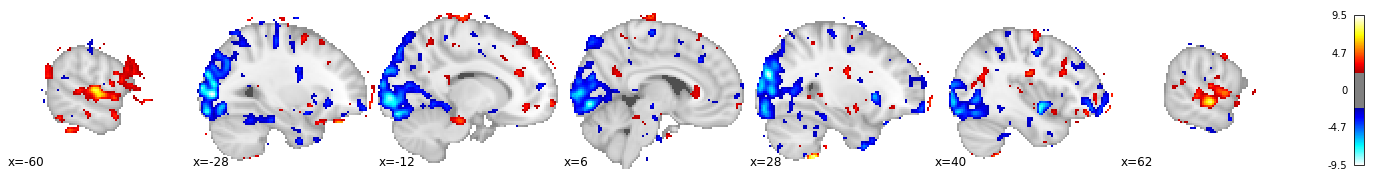

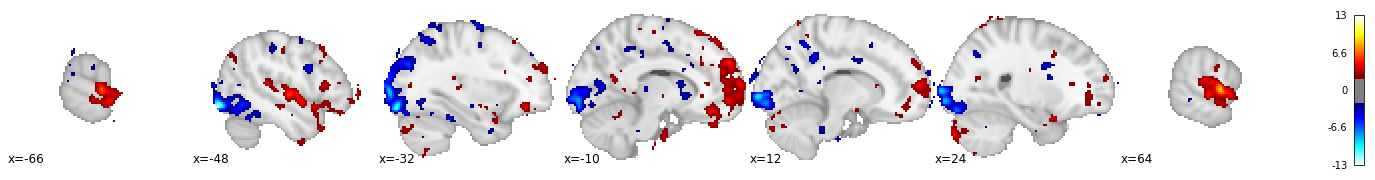

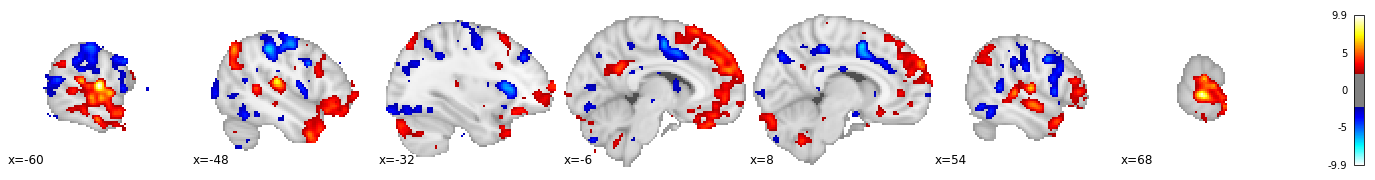

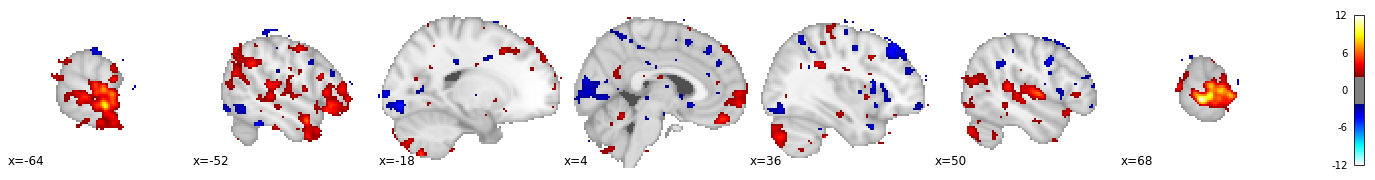

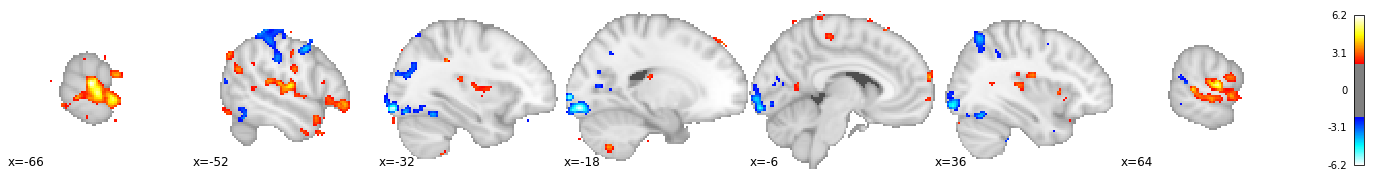

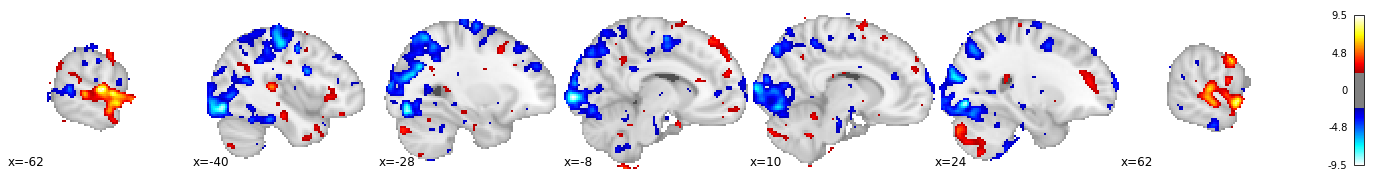

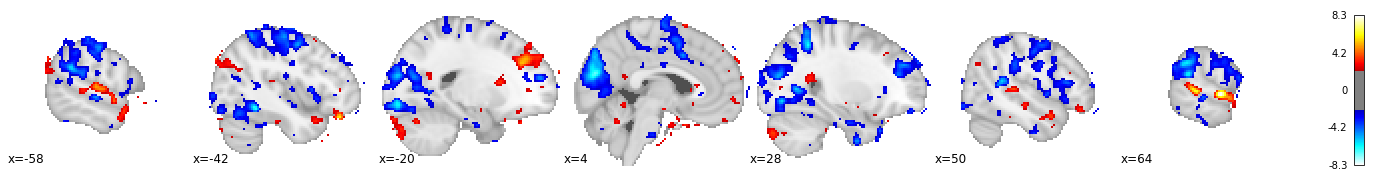

In [16]:
for img in func_files:
    print(img)
    plotting.plot_stat_map(img, threshold=2.3, display_mode='x')

In [60]:
# visualize results
t_plot = nib.load('/media/Data/work/2nd_level/_cope_5/randomize/randomise_tstat1.nii.gz')
p = nib.load('/media/Data/work/2nd_level/_cope_5/randomize/randomise_tfce_corrp_tstat1.nii.gz')
# suggested threshold should be a=0.005 / .001

thr = 0.95
t_plot_data = t_plot.get_data()
p_data = p.get_data()

# threshold raw t map by p values
p_mask = p_data < thr
t_plot_data[p_mask] = 0

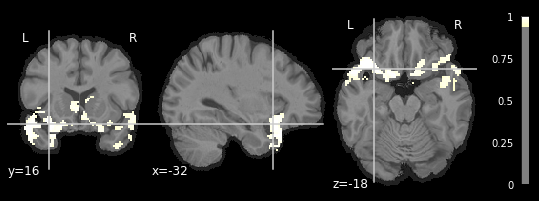

In [63]:
plotting.plot_stat_map(p, threshold = 0.95,bg_img = anat_mean,)

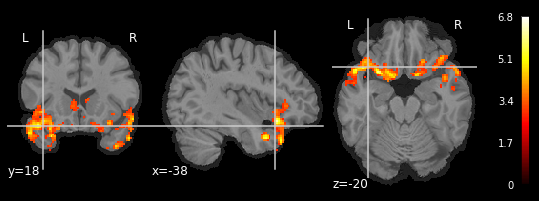

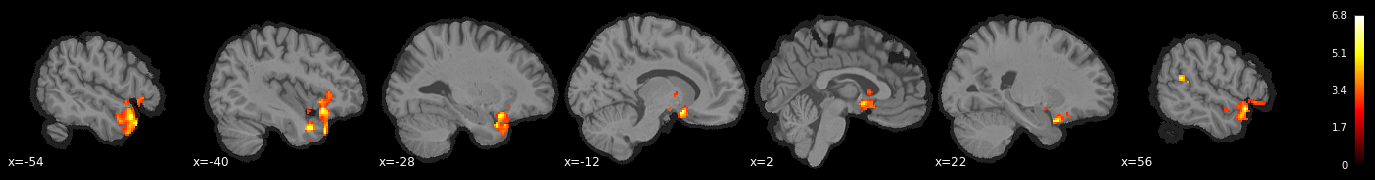

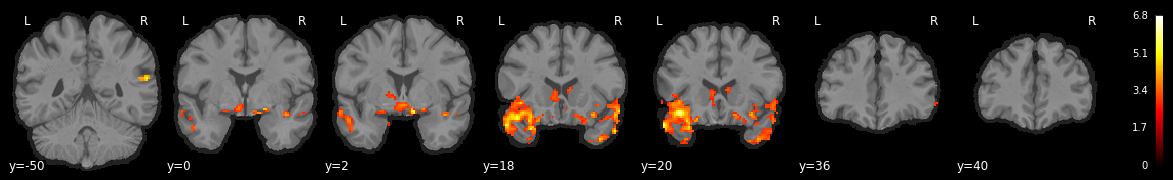

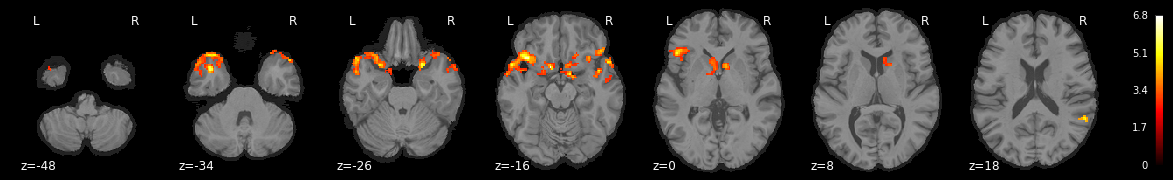

In [64]:
anat_mean = '/media/Data/KPE_BIDS/derivatives/fmriprep/sub-1322/anat/sub-1322_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="x", 
                       colorbar=True)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="y",
                       colorbar=True)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="z",
                       colorbar=True)

In [48]:
def threshold(tstat, pstat):
    t_plot = nib.load(tstat)
    p = nib.load(pstat)
    t_plot_data = t_plot.get_data()
    p_data = p.get_data()
    thr = 0.95
    # threshold raw t map by p values
    p_mask = p_data < thr
    t_plot_data[p_mask] = 0
    return(t_plot)

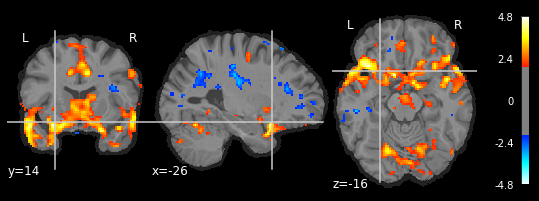

In [78]:
# plotting FLAMEO
img = '/media/Data/work/2nd_level/_cope_5/flameo_ols/stats/zstat1.nii.gz'
pstat = '/media/Data/work/2nd_level/_cope_5/fdr_ztop/zstat1_pval.nii.gz'
#t_plot = threshold(img,pstat)
plotting.plot_stat_map(img, threshold = 2,bg_img = anat_mean)#,cut_coords=[2,-60,33]
                     

ImageFileError: Cannot work out file type of "/"

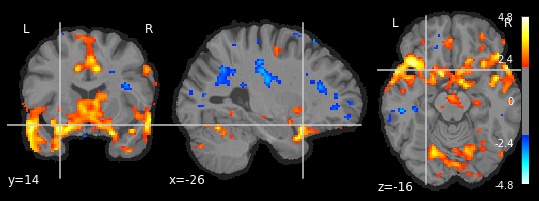

In [81]:
display = plotting.plot_stat_map(img, threshold = 2,bg_img = anat_mean)
display.add_overlay(pstat)
plotting.show()

## Analyze difference between groups

In [58]:
# lets see the difference between groups
import pandas as pd
allDat = pd.read_excel('/home/or/Documents/kpe_analyses/KPEIHR0009_data_all_scored.xlsx')
medDat = allDat[['scr_id','med_cond']]
medDat.at[17, 'med_cond'] = 1 # change subject 1464 medication to 1
medDat = medDat.append({'scr_id' : 'KPE1468' , 'med_cond' : 0}, ignore_index=True)
medDat = medDat.append({'scr_id' : 'KPE1480' , 'med_cond' : 0}, ignore_index=True)
medDat = medDat.append({'scr_id' : 'KPE1499' , 'med_cond' : 1}, ignore_index=True)

groupList = np.array(medDat['med_cond'])
groupList.shape
subjectList = medDat['scr_id']
ketList = []
midList = []
for i in medDat.iterrows():
    sub = i[1].scr_id.split('KPE')[1]
    if i[1].med_cond ==1:
        ketList.append(sub)
    elif i[1].med_cond==0:
        midList.append(sub)
    else:
        print('No medication condition')

print (f'Number of Ketamine patients is: {len(ketList)}')
print (f'Number of Midazolam patients is: {len(midList)}')

Number of Ketamine patients is: 11
Number of Midazolam patients is: 10


In [59]:
ketList

['008',
 '1223',
 '1293',
 '1307',
 '1315',
 '1322',
 '1339',
 '1343',
 '1387',
 '1464',
 '1499']

In [ ]:
ket_func_ = ['/media/Data/KPE_results/seed2voxel/MNI_space/trauma_seed_righttAmg_sub-%s_ses-1_z_MNI.nii.gz' % (sub) for sub in ketList]
ket_func_ses2 = ['/media/Data/KPE_results/seed2voxel/MNI_space/trauma_seed_rightAmg_sub-%s_ses-2_z_MNI.nii.gz' % (sub) for sub in ketList]
mid_func_ses1 = ['/media/Data/KPE_results/seed2voxel/MNI_space/trauma_seed_righttAmg_sub-%s_ses-1_z_MNI.nii.gz' % (sub) for sub in midList]
mid_func_ses2 = ['/media/Data/KPE_results/seed2voxel/MNI_space/trauma_seed_rightAmg_sub-%s_ses-2_z_MNI.nii.gz' % (sub) for sub in midList]